# Iris Flowers Discrimination

In [2]:
# Importing Data set and libraries

import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

X_iris, Y_iris = iris.data, iris.target

print(X_iris[0])



[5.1 3.5 1.4 0.2]


In [67]:
# Splitting data and standardize the features

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Get dataset with only the first two attributes

X, Y = X_iris[:,:2], Y_iris

# Split the data set into a training and a testing set

X_train,X_test,Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 33)

# Standardize the features

scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



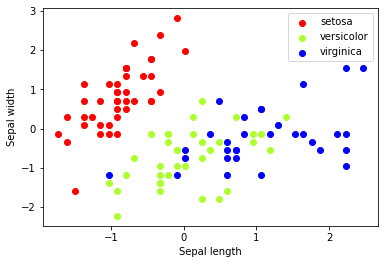

In [68]:
colors = ["red", "greenyellow", "blue"]
for i in range(len(colors)):
    xs = X_train[:, 0][Y_train == i]
    ys = X_train[:,1][Y_train == i]
    plt.scatter(xs, ys, c = colors[i])

plt.legend(iris.target_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()

In [69]:
#Stochastic Gradient Descent

from sklearn.linear_model import SGDClassifier
from matplotlib import pylab

clf = SGDClassifier()
clf.fit(X_train, Y_train)

print(clf.coef_ ,clf.intercept_)

[[-3.28911907e+01  1.00485993e+01]
 [-3.34663203e-14 -3.07677039e+00]
 [ 1.36253617e+01 -9.98921663e+00]] [-16.71943509  -2.72640618  -0.7387906 ]


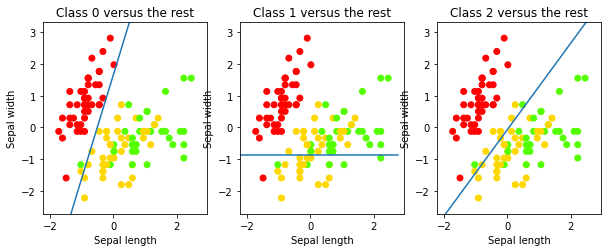

In [70]:
x_min, x_max = X_train[:,0].min() - .5, X_train[:, 0].max() + .5

y_min, y_max = X_train[:,1].min() - .5, X_train[:, 1].max() + .5

xs = np.arange(x_min,x_max, 0.5)

fig, axes = plt.subplots(1, 3)
fig.set_size_inches(10,6)

for i in [0,1,2]:
    axes[i].set_aspect("equal")
    axes[i].set_title("Class " + str(i) + " versus the rest")
    axes[i].set_xlabel("Sepal length")
    axes[i].set_ylabel("Sepal width")
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    pylab.sca(axes[i])
    plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=plt.cm.prism)
    ys = (-clf.intercept_[i] - xs * clf.coef_[i,0]) / clf.coef_[i,1]
    
    plt.plot(xs, ys )
    

In [74]:
#Evaluating Results

from sklearn import metrics

y_test_pred = clf.predict(X_test)

print (metrics.accuracy_score(Y_test, y_test_pred))

0.7105263157894737


In [75]:
print(metrics.classification_report(Y_test, y_test_pred,target_names = iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.00      0.00      0.00        11
   virginica       0.63      1.00      0.78        19

    accuracy                           0.71        38
   macro avg       0.54      0.67      0.59        38
weighted avg       0.53      0.71      0.60        38



C:\Users\vzlad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vzlad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vzlad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
# Cross Validation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline 

# create a composite estimator made by a pipeline of the standarization and the linear model

clf = Pipeline([("scaler", StandardScaler()),("linear_model", SGDClassifier())])


# create a k-fold cross validation iterator for k=5 folds

kf = KFold(n_splits=5, random_state= 33, shuffle = True)
kf.get_n_splits(X)


# by default the score used is the one returned  by score method of the estimator (accuracy)

scores = cross_val_score(clf, X, Y, cv = kf)

print(scores)

[0.76666667 0.8        0.73333333 0.9        0.9       ]


In [94]:
#Calculate the mean and the standard error

from scipy.stats import sem

def mean_score(scores):
    return ("Mean score: {0:.3f} (+/- {1: .3f})").format(np.mean(scores), sem(scores))
print( mean_score(scores))

Mean score: 0.820 (+/-  0.034)
